In [63]:
import pandas as pd
import numpy as np
import time
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


In [64]:
'''DATA SOURCE
https://www.kaggle.com/datasets/devzohaib/mushroom-edibility-classification
'''

'DATA SOURCE\nhttps://www.kaggle.com/datasets/devzohaib/mushroom-edibility-classification\n'

In [65]:
'''
1.One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)

2.cap-diameter (m): float number in cm
3.cap-shape (n): bell=b, conical=c, convex=x, flat=f,
4.sunken=s, spherical=p, others=o
5.cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
6.shiny=h, leathery=l, silky=k, sticky=t,
7.wrinkled=w, fleshy=e
8.cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
9.purple=u, red=e, white=w, yellow=y, blue=l,
10.orange=o, black=k
11.does-bruise-bleed (n): bruises-or-bleeding=t,no=f
12.gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
13.sinuate=s, pores=p, none=f, unknown=?
14.gill-spacing (n): close=c, distant=d, none=f
15.gill-color (n): see cap-color + none=f
16.stem-height (m): float number in cm
'''

'\n1.One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).\nTwenty remaining variables (n: nominal, m: metrical)\n\n2.cap-diameter (m): float number in cm\n3.cap-shape (n): bell=b, conical=c, convex=x, flat=f,\n4.sunken=s, spherical=p, others=o\n5.cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,\n6.shiny=h, leathery=l, silky=k, sticky=t,\n7.wrinkled=w, fleshy=e\n8.cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,\n9.purple=u, red=e, white=w, yellow=y, blue=l,\n10.orange=o, black=k\n11.does-bruise-bleed (n): bruises-or-bleeding=t,no=f\n12.gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,\n13.sinuate=s, pores=p, none=f, unknown=?\n14.gill-spacing (n): close=c, distant=d, none=f\n15.gill-color (n): see cap-color + none=f\n16.stem-height (m): float number in cm\n'

In [66]:
data = pd.read_csv('secondary_data.csv',delimiter=';')
print(data)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [67]:
'''Check for null values'''
print(data.isnull().sum())

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [68]:
'''Some columns are completley NaN values so ,Removing colums where amount of NULL is near amount of samples'''
data = data.drop('spore-print-color', axis=1)
data = data.drop('veil-color', axis=1)
data = data.drop('veil-type', axis=1)
data = data.drop('stem-surface', axis=1)
data = data.drop('stem-root', axis=1)
data = data.drop('gill-spacing', axis=1)
print(data.isnull().sum())

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64


In [69]:
'''Now we want to drop any rows that have NULL values'''
data = data.dropna(how='any',axis=0)
print(data.isnull().sum())
print(data)

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64
      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s 

In [70]:
'''Display information about the dataset'''
print(data.info())#Get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37065 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 37065 non-null  object 
 1   cap-diameter          37065 non-null  float64
 2   cap-shape             37065 non-null  object 
 3   cap-surface           37065 non-null  object 
 4   cap-color             37065 non-null  object 
 5   does-bruise-or-bleed  37065 non-null  object 
 6   gill-attachment       37065 non-null  object 
 7   gill-color            37065 non-null  object 
 8   stem-height           37065 non-null  float64
 9   stem-width            37065 non-null  float64
 10  stem-color            37065 non-null  object 
 11  has-ring              37065 non-null  object 
 12  ring-type             37065 non-null  object 
 13  habitat               37065 non-null  object 
 14  season                37065 non-null  object 
dtypes: float64(3), obje

In [71]:
#We need to re-define X with only the colums without null values
X = data[[
    'cap-diameter',
    'cap-shape',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-color',
    'stem-height',
    'stem-width',
    'stem-color',
    'has-ring',
    'habitat',
    'season'
]].values
#print(X)

#Redifine y here for clarity
y = data [[
    'class'
]]
#print(y['class'])

p    20121
e    16944
Name: class, dtype: int64


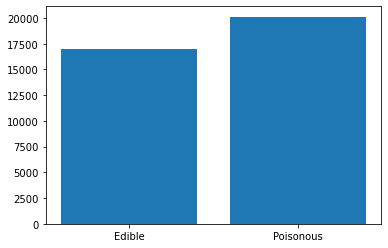

In [72]:
#scatter
count = data['class'].value_counts()
print(count)
x_axis = ['Edible','Poisonous']
y_axis = [count['e'],count['p']]
plt.bar(x_axis,y_axis)
plt.show()

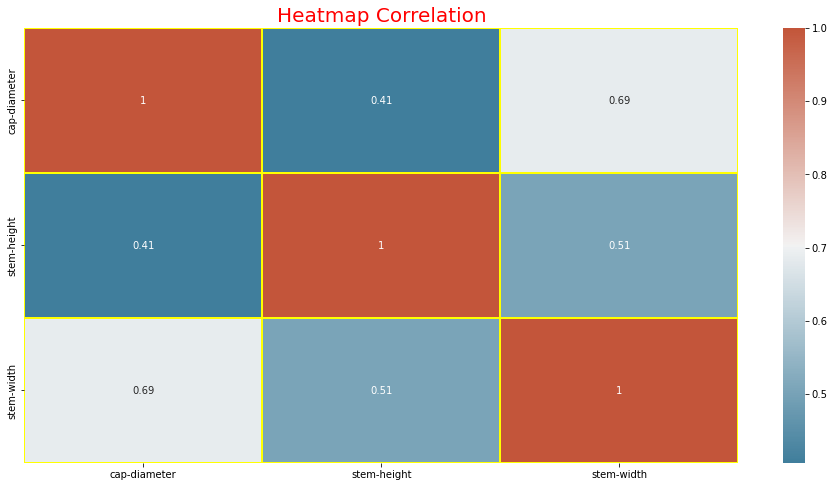

In [73]:
import seaborn as sns
correlation = data.corr(method='pearson')
plt.figure(figsize=(16,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, linecolor='yellow',cmap=cmap,linewidths=0.25, annot=True)
plt.title('Heatmap Correlation', size=20, color='red')
plt.show()   

In [74]:
'''
Convert class e,p to numbers 0,1
Convert all other classifcations to numbers 
'''
Le = LabelEncoder()#Convert all data in X to numbers so it can be used
for i in range(len(X[0])):#Iterate over all instances in X
    X[:, i] = Le.fit_transform(X[:, i])#Transform to number using fit_transform


label_mapping = { #Create a dict for e(edible) and p(poisonous)
    'e':0, #Assign 'e' as 0
    'p':1 #Assign 'p' as 1
}
y['class'] = y['class'].map(label_mapping)
y = np.array(y)#Make y an array
y=np.ravel(y)#Make y a 1D array

print(X,y)#Check to make sure transormations happened

[[1471 6 6 ... 1 0 3]
 [1603 6 6 ... 1 0 2]
 [1352 6 6 ... 1 0 3]
 ...
 [73 5 11 ... 0 0 2]
 [70 2 11 ... 0 0 2]
 [63 5 11 ... 0 0 2]] [1 1 1 ... 1 1 1]


C:\Users\Ben\AppData\Local\Temp\ipykernel_4592\1604521415.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_mapping)


In [83]:
'''
To start lets make n_neighbours = sqrt(number of samples)
n_neighbours = sqrt(37065) = 192.52 -> 193
and use the default parameters for weights and algorithm.
'''
kNeighbors = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto')

In [84]:
'''Train model with all X_values'''
def train_model(model):#Function to train with selected model
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return round(metrics.accuracy_score(y_test, prediction), 3), classification_report(y_test, prediction, target_names = ['edible(0)', 'poisonous(1)'])

In [78]:
'''
Split data for training and testing
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [85]:


kN_accuracy, kN_report = train_model(kNeighbors)#Start KNeigbour Training
Log_accuracy, Log_report = train_model(LogisticRegression(max_iter=1000))

#Start Log Regression training

In [86]:
print("\033[1mKNN Report \033[0m")
print("Accuracy:{}\n{}".format(kN_accuracy, kN_report))

print("\033[1m Logistic Regression Report \033[0m")
print("Accuracy:{}\n{}".format(Log_accuracy, Log_report))

KNN Report 
Accuracy:0.842
              precision    recall  f1-score   support

   edible(0)       0.82      0.83      0.83      4188
poisonous(1)       0.86      0.85      0.86      5079

    accuracy                           0.84      9267
   macro avg       0.84      0.84      0.84      9267
weighted avg       0.84      0.84      0.84      9267

 Logistic Regression Report 
Accuracy:0.609
              precision    recall  f1-score   support

   edible(0)       0.59      0.45      0.51      4188
poisonous(1)       0.62      0.74      0.67      5079

    accuracy                           0.61      9267
   macro avg       0.60      0.60      0.59      9267
weighted avg       0.61      0.61      0.60      9267



Minimum error:- 0.15603755260602137 at K = 25


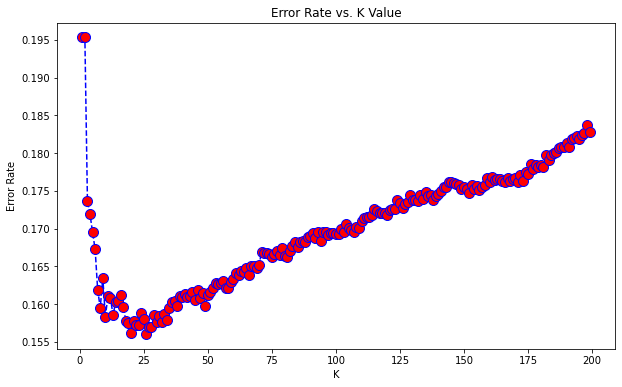

In [81]:
'''
Finding the optimal value for K
Generally is N where N^2 = number of samples
so would be k = sqrt(37065) -> 192.52
Below we are calculating the error rate for each value of K and then plotting it on a graph
Code from https://gist.github.com/Amey23/656c1f1fb76308aee0e9102db78e6816
It creates an error rate vs K value graph for KNeighbours
'''

error_rate = []
for i in range(1,200):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8439624473939786 at K = 25


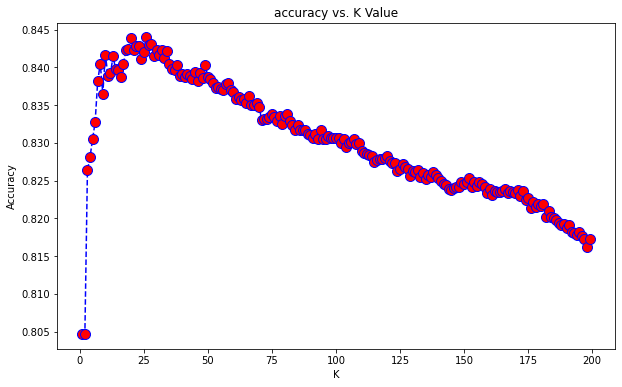

In [82]:
'''We can confirm this value of K further by doing accuracy tests from k=1 to k=200
Code from https://gist.github.com/Amey23/eef79eec951bb889f40a5f0a662920c3#file-knn4-py
It creates a accuracy vs K value graph for KNeighbours
'''
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,200):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,200),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [87]:
'''Next lets use a scaler to try and improve perfomace for both algorithms'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)
kNeighbors = KNeighborsClassifier(n_neighbors=37, weights='uniform', algorithm='auto')

s_kN_accuracy, s_kN_report = train_model(kNeighbors)#Start KNeigbour Training
s_Log_accuracy, s_Log_report = train_model(LogisticRegression(max_iter=1000))

print("\033[1mKNN Report \033[0m")
print("Accuracy:{}\n{}".format(s_kN_accuracy, s_kN_report))

print("\033[1m Logistic Regression Report \033[0m")
print("Accuracy:{}\n{}".format(s_Log_accuracy, s_Log_report))




KNN Report 
Accuracy:0.957
              precision    recall  f1-score   support

   edible(0)       0.94      0.97      0.95      4210
poisonous(1)       0.98      0.95      0.96      5057

    accuracy                           0.96      9267
   macro avg       0.96      0.96      0.96      9267
weighted avg       0.96      0.96      0.96      9267

 Logistic Regression Report 
Accuracy:0.611
              precision    recall  f1-score   support

   edible(0)       0.59      0.47      0.52      4210
poisonous(1)       0.62      0.73      0.67      5057

    accuracy                           0.61      9267
   macro avg       0.61      0.60      0.60      9267
weighted avg       0.61      0.61      0.60      9267



In [88]:
print("Scaling increased KNN from {} to {}, thats a {}% increase".format(kN_accuracy,s_kN_accuracy, (s_kN_accuracy-kN_accuracy)/kN_accuracy*100))

print("Scaling increased LogisticRegression from {} to {}, thats a {}% increase".format(Log_accuracy,s_Log_accuracy, (s_Log_accuracy-Log_accuracy)/Log_accuracy*100))

Scaling increased KNN from 0.842 to 0.957, thats a 13.65795724465558% increase
Scaling increased LogisticRegression from 0.609 to 0.611, thats a 0.32840722495894936% increase


In [89]:
'''Cross Validation ShuffleSplit'''
alg = KNeighborsClassifier(n_neighbors=37, weights='uniform', algorithm='auto')
SS = ShuffleSplit(train_size=0.8, test_size=0.2, n_splits = 10)
CVscores = cross_val_score(alg, X_scaled, y, cv = SS)

print("Cross Validation Scores of scaled data: ", CVscores)
print("Average Score of scaled data: ", CVscores.mean())
print("Max Score of scaled data: ", CVscores.max())



Cross Validation Scores of scaled data:  [0.95764198 0.95953055 0.96209362 0.95683259 0.9631728  0.9631728
 0.96182382 0.96033994 0.956293   0.96128423]
Average Score of scaled data:  0.9602185350060705
Max Score of scaled data:  0.9631728045325779


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


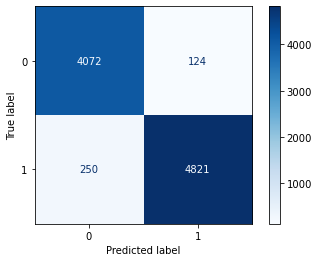

<Figure size 7200x7200 with 0 Axes>

In [55]:
'''Confusion Matrix'''
kNeighbors = KNeighborsClassifier(n_neighbors=37, weights='uniform', algorithm='auto')
kNeighbors.fit(X_train, y_train)
y_prediction = kNeighbors.predict(X_test)
confusion_matrix(y_test, y_prediction)
graph = plot_confusion_matrix(kNeighbors, X_test, y_test, cmap=plt.cm.Blues)
plt.show()